In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.linalg import sqrtm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [3]:

# Lecture des données
transfer_data = pd.read_csv('transfers.csv')

# Exploration initiale
print("Format des données initiales :", transfer_data.shape)
print("\nColonnes disponibles :", transfer_data.columns.tolist())


# Conversion et extraction des dates
transfer_data['transfer_date'] = pd.to_datetime(transfer_data['transfer_date'], errors='coerce')

# Suppression des colonnes inutiles
columns_to_delete = ['transfer_season']  # Le mois du transfert pourrait être intéressant
transfer_data = transfer_data.drop(columns=columns_to_delete, errors='ignore')

# Nettoyage des données
cleaned_transfer_data = transfer_data.dropna()
cleaned_transfer_data = cleaned_transfer_data[cleaned_transfer_data['transfer_fee'] != 0]

# Trier les transferts par player_id et date de transfert
cleaned_transfer_data = cleaned_transfer_data.sort_values(by=['player_id', 'transfer_date'], ascending=[True, False])



print("\nFormat après nettoyage :", cleaned_transfer_data.shape)


# Exploration des clubs et des joueurs uniques
print("\nNombre de clubs différents (origine) :", cleaned_transfer_data['from_club_name'].nunique())
print("\nNombre de clubs différents (destination) :", cleaned_transfer_data['to_club_name'].nunique())
print("\nNombre de joueurs différents :", cleaned_transfer_data['player_id'].nunique())

# Aperçu des données nettoyées
print("\nAperçu des données nettoyées :")
cleaned_transfer_data.head()





Format des données initiales : (78060, 10)

Colonnes disponibles : ['player_id', 'transfer_date', 'transfer_season', 'from_club_id', 'to_club_id', 'from_club_name', 'to_club_name', 'transfer_fee', 'market_value_in_eur', 'player_name']

Format après nettoyage : (8564, 9)

Nombre de clubs différents (origine) : 1473

Nombre de clubs différents (destination) : 882

Nombre de joueurs différents : 4864

Aperçu des données nettoyées :


,player_id,transfer_date,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
72893,3333,2010-08-17,405,281,Aston Villa,Man City,22000000.0,20000000.0,James Milner
75325,3333,2008-08-29,762,405,Newcastle,Aston Villa,15000000.0,8750000.0,James Milner
76185,4391,2007-07-01,306,1090,Heerenveen,AZ Alkmaar,3000000.0,800000.0,Boy Waterman
11396,7161,2023-07-05,18,15,Bor. M'gladbach,B. Leverkusen,10000000.0,13000000.0,Jonas Hofmann
58708,7161,2016-01-01,16,18,Bor. Dortmund,Bor. M'gladbach,8000000.0,4000000.0,Jonas Hofmann


In [ ]:

# Lecture des données
players_data = pd.read_csv('players.csv')

# Exploration initiale
print("Format des données initiales :", players_data.shape)
print("\nColonnes disponibles :", players_data.columns.tolist())


# Conversion et extraction des dates
players_data['date_of_birth'] = pd.to_datetime(players_data['date_of_birth'], errors='coerce')

# Suppression des colonnes inutiles
columns_to_delete_player = ['current_club_id', 'last_season','first_name', 'last_name', 'player_code', 'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'sub_position', 'foot', 'height_in_cm', 'contract_expiration_date', 
                     'agent_name', 'image_url', 'url', 'current_club_domestic_competition_id', 'current_club_name', 'highest_market_value_in_eur', 'market_value_in_eur']  # La date de fin du contrat aurait était interressante si c'était celle du conctrat avant le transfert mais ça n'est pas le cas
#on a la date de fin du contrat en cours du joueur (ou dernier contrat si il est à la retraite)
players_data = players_data.drop(columns=columns_to_delete_player, errors='ignore')

# Nettoyage des données
cleaned_players_data = players_data.dropna()


print("\nFormat après nettoyage :", cleaned_players_data.shape)

# Exploration des clubs et des joueurs uniques
print("\nNombre de joueurs différents :", cleaned_players_data['player_id'].nunique())
print("\nNombre de positions :", cleaned_players_data['position'].unique())
# Aperçu des données nettoyées
print("\nAperçu des données nettoyées :")
cleaned_players_data.head()

Format des données initiales : (32419, 23)

Colonnes disponibles : ['player_id', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name', 'image_url', 'url', 'current_club_domestic_competition_id', 'current_club_name', 'market_value_in_eur', 'highest_market_value_in_eur']

Format après nettoyage : (32372, 4)

Nombre de joueurs différents : 32372

Nombre de positions : ['Attack' 'Goalkeeper' 'Defender' 'Midfield' 'Missing']

Aperçu des données nettoyées :


,player_id,name,date_of_birth,position
0,10,Miroslav Klose,1978-06-09,Attack
1,26,Roman Weidenfeller,1980-08-06,Goalkeeper
2,65,Dimitar Berbatov,1981-01-30,Attack
3,77,Lúcio,1978-05-08,Defender
4,80,Tom Starke,1981-03-18,Goalkeeper


In [ ]:

# Lecture des données
clubs_data = pd.read_csv('clubs.csv')

# Exploration initiale
print("Format des données initiales :", clubs_data.shape)
print("\nColonnes disponibles :", clubs_data.columns.tolist())


# Suppression des colonnes inutiles
columns_to_delete_clubs = ['club_code','name','total_market_value', 'squad_size', 'average_age', 'foreigners_number', 'foreigners_percentage', 'national_team_players', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season', 'filename', 'url'] 

clubs_data = clubs_data.drop(columns=columns_to_delete_clubs, errors='ignore')

# Nettoyage des données
cleaned_clubs_data = clubs_data.dropna()


print("\nFormat après nettoyage :", cleaned_clubs_data.shape)

# Aperçu des données nettoyées
#print("\nAperçu des données nettoyées :")
cleaned_clubs_data.head()

Format des données initiales : (439, 17)

Colonnes disponibles : ['club_id', 'club_code', 'name', 'domestic_competition_id', 'total_market_value', 'squad_size', 'average_age', 'foreigners_number', 'foreigners_percentage', 'national_team_players', 'stadium_name', 'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season', 'filename', 'url']

Format après nettoyage : (439, 2)


,club_id,domestic_competition_id
0,105,L1
1,11127,RU1
2,114,TR1
3,12,IT1
4,148,GB1


In [4]:

# Lecture des données
appearances_data = pd.read_csv('appearances.csv')

# Exploration initiale
print("Format des données initiales :", appearances_data.shape)
print("\nColonnes disponibles :", appearances_data.columns.tolist())


# Suppression des colonnes inutiles
columns_to_delete_appearances = ['appearance_id', 'game_id', 'player_club_id', 'player_current_club_id', 'player_name', 'competition_id', 'yellow_cards', 'red_cards'] 
appearances_data = appearances_data.drop(columns=columns_to_delete_appearances, errors='ignore')

# Nettoyage des données
cleaned_appearances_data = appearances_data.dropna()


print("\nFormat après nettoyage :", cleaned_appearances_data.shape)


# Aperçu des données nettoyées
print("\nAperçu des données nettoyées :")
cleaned_appearances_data.head()

Format des données initiales : (1652786, 13)

Colonnes disponibles : ['appearance_id', 'game_id', 'player_id', 'player_club_id', 'player_current_club_id', 'date', 'player_name', 'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']

Format après nettoyage : (1652786, 5)

Aperçu des données nettoyées :


,player_id,date,goals,assists,minutes_played
0,38004,2012-07-03,2,0,90
1,79232,2012-07-05,0,0,90
2,42792,2012-07-05,0,0,45
3,73333,2012-07-05,0,0,90
4,122011,2012-07-05,0,1,90


In [ ]:
merged_data = pd.merge(cleaned_appearances_data, cleaned_players_data, on='player_id', how='inner')
merged_data = pd.merge(merged_data, cleaned_transfer_data, on='player_id', how='inner')
merged_data = merged_data.sort_values(by=['player_id','date'], ascending=[True,False])

# Calculer la période de 4 ans avant le transfert et jusqu'à 1 mois avant
merged_data['start_period'] = merged_data['transfer_date'] - pd.DateOffset(years=4)
merged_data['end_period'] = merged_data['transfer_date'] - pd.DateOffset(months=1)

# Filtrer les matchs qui sont dans cette période
merged_data = merged_data[
    (merged_data['date'] >= merged_data['start_period']) & 
    (merged_data['date'] <= merged_data['end_period'])
]

#calcul l'age du joeur au moment du transfert
merged_data['age_at_transfer'] = merged_data['transfer_date'].dt.year - merged_data['date_of_birth'].dt.year
merged_data.head()

,player_id,date,goals,assists,minutes_played,name,date_of_birth,position,transfer_date,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name,start_period,end_period,age_at_transfer
1084516,7161,2023-05-27,1,1,90,Jonas Hofmann,1992-07-14,Midfield,2023-07-05,18,15,Bor. M'gladbach,B. Leverkusen,10000000.0,13000000.0,Jonas Hofmann,2019-07-05,2023-06-05,31
1081865,7161,2023-05-21,1,0,90,Jonas Hofmann,1992-07-14,Midfield,2023-07-05,18,15,Bor. M'gladbach,B. Leverkusen,10000000.0,13000000.0,Jonas Hofmann,2019-07-05,2023-06-05,31
1077105,7161,2023-05-13,0,0,90,Jonas Hofmann,1992-07-14,Midfield,2023-07-05,18,15,Bor. M'gladbach,B. Leverkusen,10000000.0,13000000.0,Jonas Hofmann,2019-07-05,2023-06-05,31
1073617,7161,2023-05-06,1,0,90,Jonas Hofmann,1992-07-14,Midfield,2023-07-05,18,15,Bor. M'gladbach,B. Leverkusen,10000000.0,13000000.0,Jonas Hofmann,2019-07-05,2023-06-05,31
1069232,7161,2023-04-29,0,0,90,Jonas Hofmann,1992-07-14,Midfield,2023-07-05,18,15,Bor. M'gladbach,B. Leverkusen,10000000.0,13000000.0,Jonas Hofmann,2019-07-05,2023-06-05,31


In [ ]:
# Regrouper par player_id et transfer_id et calculer la somme des buts, la somme des assists, et la moyenne des minutes jouées
aggregated_data = merged_data.groupby(['player_id', 'transfer_date']).agg(
    total_goals=('goals', 'sum'),
    total_assists=('assists', 'sum'),
    average_minutes_played=('minutes_played', 'mean'),
    club_id=('from_club_id','first'),
    from_club_name=('from_club_name','first'),
    to_club_id=('to_club_id','first'),
    to_club_name=('to_club_name','first'),
    position=('position','first'),
    name=('name','first'),
    age_at_transfer=('age_at_transfer','first'),
    transfer_fee=('transfer_fee','first'),
    market_value_in_eur=('market_value_in_eur','first'),
).reset_index()
print("Format des données initiales :", aggregated_data.shape)
# Filtrer pour les milieux de terrain et les attaquants

aggregated_data = aggregated_data[aggregated_data['position'].isin(['Midfield', 'Attack'])]

aggregated_data = pd.merge(aggregated_data, cleaned_clubs_data, on='club_id', how='inner')
print("Format des données initiales :", aggregated_data.shape)
print("\nNombre de clubs différents (origine) :", aggregated_data['club_id'].nunique())
print("\nNom de championnats différents (origine) :", aggregated_data['domestic_competition_id'].unique())




aggregated_data.head(15)

Format des données initiales : (5539, 14)
Format des données initiales : (2978, 15)

Nombre de clubs différents (origine) : 360

Nombre de championnats différents (origine) : ['L1' 'ES1' 'PO1' 'GB1' 'IT1' 'UKR1' 'NL1' 'FR1' 'TR1' 'RU1' 'BE1' 'DK1'
 'GR1' 'SC1']


,player_id,transfer_date,total_goals,total_assists,average_minutes_played,club_id,from_club_name,to_club_id,to_club_name,position,name,age_at_transfer,transfer_fee,market_value_in_eur,domestic_competition_id
0,7161,2016-01-01,8,15,37.298507,16,Bor. Dortmund,18,Bor. M'gladbach,Midfield,Jonas Hofmann,24,8000000.0,4000000.0,L1
1,7161,2023-07-05,39,34,76.886179,18,Bor. M'gladbach,15,B. Leverkusen,Midfield,Jonas Hofmann,31,10000000.0,13000000.0,L1
2,16306,2015-07-01,0,1,28.769231,418,Real Madrid,720,FC Porto,Midfield,Casemiro,23,7500000.0,10000000.0,ES1
3,16306,2015-07-02,0,1,28.769231,720,FC Porto,418,Real Madrid,Midfield,Casemiro,23,15000000.0,10000000.0,PO1
4,16306,2022-08-22,17,16,83.453039,418,Real Madrid,985,Man Utd,Midfield,Casemiro,30,70650000.0,40000000.0,ES1
5,18644,2013-07-17,31,4,83.880952,368,Sevilla FC,281,Man City,Attack,Álvaro Negredo,28,25000000.0,20000000.0,ES1
6,18644,2015-07-01,54,15,62.658333,281,Man City,1049,Valencia,Attack,Álvaro Negredo,30,28000000.0,18000000.0,GB1
7,18644,2017-08-04,45,18,58.554140,1049,Valencia,114,Besiktas,Attack,Álvaro Negredo,32,2500000.0,7500000.0,ES1
8,19041,2015-08-19,11,5,76.205128,6195,SSC Napoli,1003,Leicester,Midfield,Gökhan Inler,31,7000000.0,7500000.0,IT1
9,20005,2013-08-02,9,7,84.051282,1627,Catania,6414,Metalist Kharkiv,Attack,Papu Gómez,25,7000000.0,11000000.0,IT1


In [151]:
# Dictionnaire des championnats et de leur niveau
championship_levels = {
    'L1': 2,     # Bundesliga (Allemagne)
    'ES1': 2,    # La Liga (Espagne)
    'GB1': 2,    # Premier League (Angleterre)
    'IT1': 2,    # Serie A (Italie)
    'PO1': 1,    # Primeira Liga (Portugal)
    'NL1': 1,   # Eredivisie (Pays-Bas)
    'FR1': 2,    # Ligue 1 (France)
    'TR1': 1,   # Süper Lig (Turquie)
    'RU1': 1,   # Russian Premier League (Russie)
    'BE1': 1,   # Pro League (Belgique)
    'DK1': 0,   # Superliga (Danemark)
    'GR1': 0,   # Super League (Grèce)
    'SC1': 0,   # Scottish Premiership (Écosse)
    'UKR1': 0,
    # Vous pouvez ajouter d'autres championnats si nécessaire
}

# Ajouter une colonne 'championship_level' en fonction de 'championnat_id'
aggregated_data['championship_level'] = aggregated_data['domestic_competition_id'].map(championship_levels)
aggregated_data['position_encoded'] = aggregated_data['position'].map({'Attack': 1, 'Midfield': 2})


columns_to_delete_agg = ['transfer_date','domestic_competiton_id','club_id','to_club_id','position'] 
aggregated_data = aggregated_data.drop(columns=columns_to_delete_agg, errors='ignore')




# Afficher les 5 premières lignes pour vérifier
aggregated_data.head(15)


,player_id,total_goals,total_assists,average_minutes_played,from_club_name,to_club_name,name,age_at_transfer,transfer_fee,market_value_in_eur,domestic_competition_id,championship_level,position_encoded
0,7161,8,15,37.298507,Bor. Dortmund,Bor. M'gladbach,Jonas Hofmann,24,8000000.0,4000000.0,L1,2,2
1,7161,39,34,76.886179,Bor. M'gladbach,B. Leverkusen,Jonas Hofmann,31,10000000.0,13000000.0,L1,2,2
2,16306,0,1,28.769231,Real Madrid,FC Porto,Casemiro,23,7500000.0,10000000.0,ES1,2,2
3,16306,0,1,28.769231,FC Porto,Real Madrid,Casemiro,23,15000000.0,10000000.0,PO1,1,2
4,16306,17,16,83.453039,Real Madrid,Man Utd,Casemiro,30,70650000.0,40000000.0,ES1,2,2
5,18644,31,4,83.880952,Sevilla FC,Man City,Álvaro Negredo,28,25000000.0,20000000.0,ES1,2,1
6,18644,54,15,62.658333,Man City,Valencia,Álvaro Negredo,30,28000000.0,18000000.0,GB1,2,1
7,18644,45,18,58.554140,Valencia,Besiktas,Álvaro Negredo,32,2500000.0,7500000.0,ES1,2,1
8,19041,11,5,76.205128,SSC Napoli,Leicester,Gökhan Inler,31,7000000.0,7500000.0,IT1,2,2
9,20005,9,7,84.051282,Catania,Metalist Kharkiv,Papu Gómez,25,7000000.0,11000000.0,IT1,2,1


<Axes: >

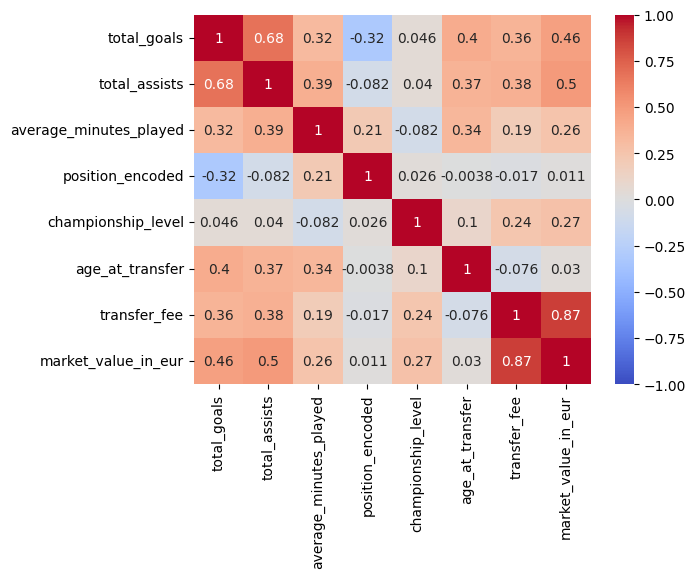

In [162]:
# Définir les deux ensembles de variables
X_receiver = aggregated_data[['total_goals', 'total_assists', 'average_minutes_played','position_encoded','championship_level','age_at_transfer']]  # Performances
Y_receiver = aggregated_data[['transfer_fee','market_value_in_eur']]  # Transferts
df_transfer = pd.concat([X_receiver, Y_receiver],axis=1)

# Calculer la matrice de corrélation
corr_matrix_transfer = df_transfer.corr()

# Créer une heatmap de la matrice de corrélation
sns.heatmap(corr_matrix_transfer, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)


Matrix Correlation of Canonical Variables :


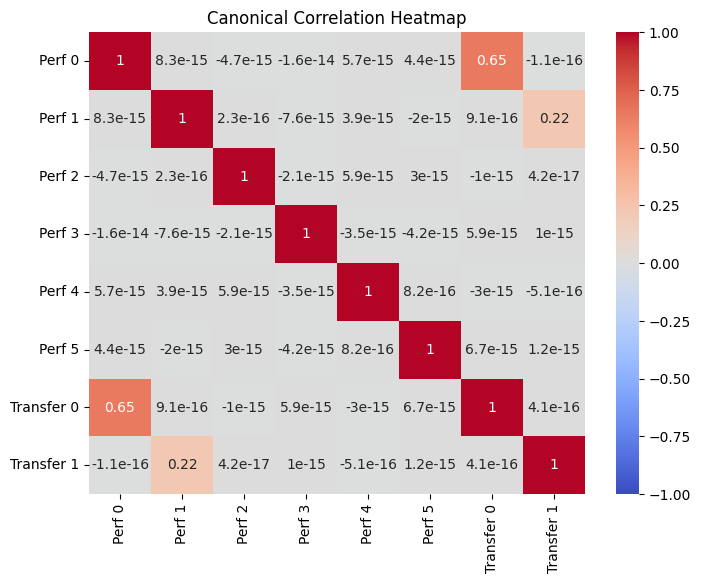

In [163]:
def empirical_cov_mat(X,Y):
    nx = X.shape[0]
    ny = Y.shape[0] 
        
    X_c = X - np.mean(X, axis=0)
    Y_c = Y - np.mean(Y, axis=0)
    # Vérification de NaN ou Inf dans les données
    if np.any(np.isnan(X)) or np.any(np.isnan(Y)) or np.any(np.isinf(X)) or np.any(np.isinf(Y)):
        print("Données contiennent des NaN ou Inf !")
    if nx != ny:
        print('ERROR : X,Y have not the same sample size')
    else:
        S_XX = (X_c.T.dot(X_c))/nx
        S_YY = (Y_c.T.dot(Y_c))/nx
        S_XY = (X_c.T.dot(Y_c))/nx
        S_YX = S_XY.T
    return S_XX,S_YY,S_XY,S_YX

def canonical_correlation_analysis(X, Y):
    
    # Step 1: Compute covariance matrices
    S_xx,S_yy,S_xy,S_yx = empirical_cov_mat(X,Y)
    
    # Step 2: Compute the inverse and sqrt of the covariance matrices
    if S_xx.size==1:
        S_xx_inv=1/S_xx
    else:
        S_xx_inv = np.linalg.inv(S_xx)
    if S_yy.size==1:    
        S_yy_inv=1/S_yy
    else:
        S_yy_inv = np.linalg.inv(S_yy)

    if S_xx_inv.size==1:
        SQx= np.sqrt(S_xx_inv)
    else:
        SQx =sqrtm(S_xx_inv)
    if S_yy_inv.size ==1 :
        SQy=np.sqrt(S_yy_inv)
    else:
        SQy =sqrtm(S_yy_inv)
        
    M = SQx.dot(S_xy).dot(SQy)

    U,ccs,Vt = np.linalg.svd(M)

    a = SQx.dot(U)
    b = SQy.dot(Vt.T)

    C_X = (X - np.mean(X, axis=0)).dot(a)

    C_Y = (Y - np.mean(Y, axis=0)).dot(b)


    return C_X, C_Y, a, b, ccs
X_c, Y_c, a, b, sing_value = canonical_correlation_analysis(np.array(X_receiver), np.array(Y_receiver))
# Plot canonical correlations
print("\nMatrix Correlation of Canonical Variables :")

df_T = pd.DataFrame()
for k in range(X_c.shape[1]):
    df_T['Perf ' + str(k)] = X_c[:, k]

for k in range(Y_c.shape[1]): 
    df_T['Transfer ' + str(k)] = Y_c[:, k]

# Calcul de la matrice de corrélation croisée
new_cross_corr = df_T.corr()

# Affichage de la carte thermique de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(new_cross_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Canonical Correlation Heatmap")
plt.show()

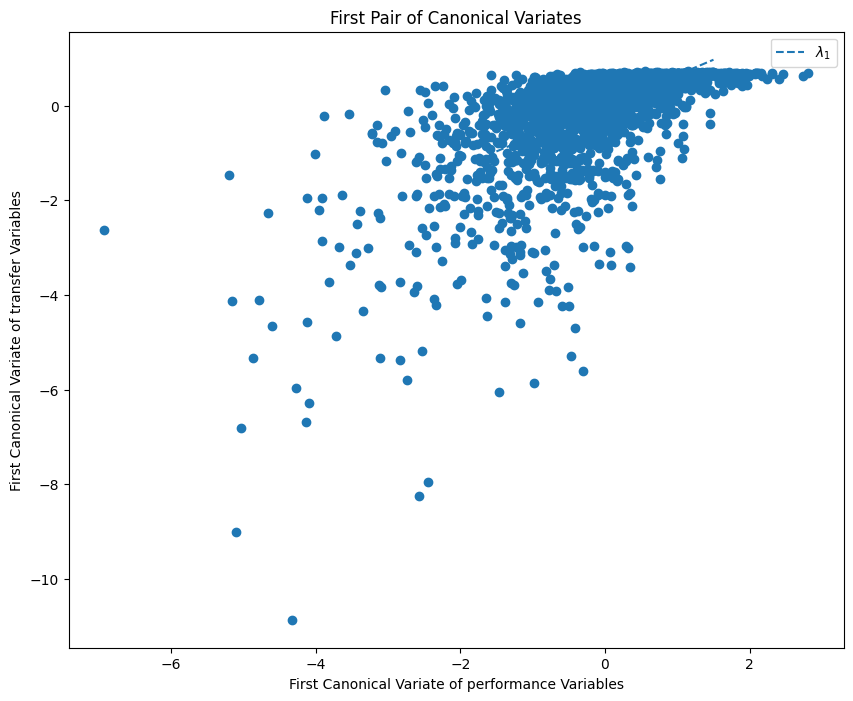

In [164]:
# Plot the first pair of canonical variates
plt.figure(figsize=(10, 8))
plt.scatter(X_c[:, 0], Y_c[:, 0])
plt.plot(np.linspace(-1.5, 1.5, 100), sing_value[0] * np.linspace(-1.5, 1.5, 100), '--', label=r'$\lambda_1$')
plt.xlabel('First Canonical Variate of performance Variables')
plt.ylabel('First Canonical Variate of transfer Variables')
plt.title('First Pair of Canonical Variates')
plt.legend()
plt.show()

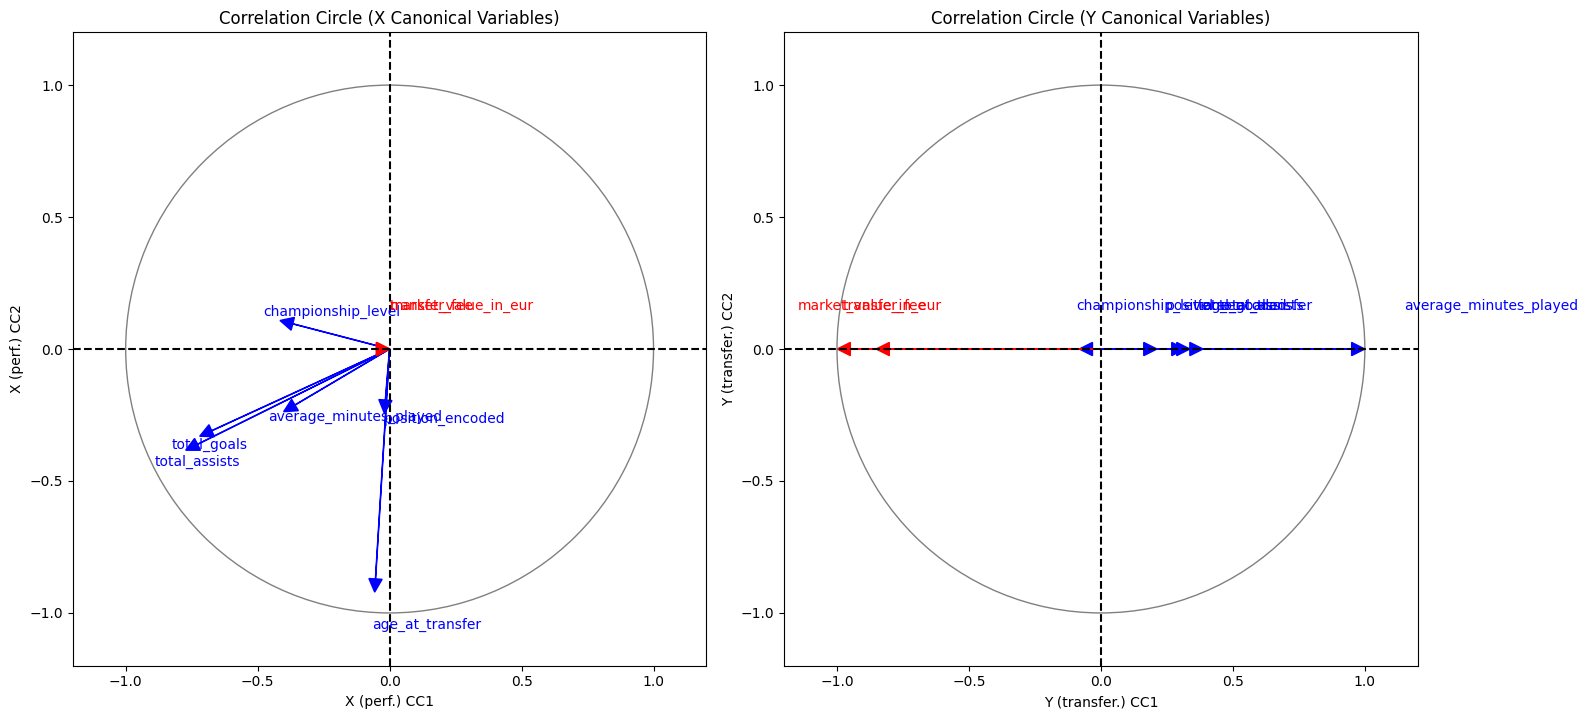

In [159]:
def plot_correlation_circles(X, Y, X_c, Y_c, X_names=None, Y_names=None, X_can=None, Y_can=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Correlations for X original variables with X canonical variables
    x_loadings_x = np.corrcoef(X.T, X_c.T)[:X.shape[1], X.shape[1]:]
    
    # Correlations for Y original variables with X canonical variables
    y_loadings_x = np.corrcoef(Y.T, X_c.T)[:Y.shape[1], X_c.shape[1]:]

    # Correlations for X original variables with Y canonical variables
    x_loadings_y = np.corrcoef(X.T, Y_c.T)[:X.shape[1], Y_c.shape[1]:]
    
    # Correlations for Y original variables with Y canonical variables
    y_loadings_y = np.corrcoef(Y.T, Y_c.T)[:Y.shape[1], Y_c.shape[1]:]

    # Plot relative to X canonical variables
    ax1.set_title('Correlation Circle (X Canonical Variables)')
    for i in range(X.shape[1]):
        ax1.arrow(0, 0, x_loadings_x[i, 0], x_loadings_x[i, 1], 
                  head_width=0.05, head_length=0.05, fc='blue', ec='blue', length_includes_head=True)
        if X_names is None:
            ax1.text(x_loadings_x[i, 0]*1.15, x_loadings_x[i, 1]*1.15, f'X{i+1}', color='blue')
        else:
            ax1.text(x_loadings_x[i, 0]*1.15, x_loadings_x[i, 1]*1.15, X_names[i], color='blue')
    for i in range(Y.shape[1]):
        ax1.arrow(0, 0, y_loadings_x[i, 0], 0,  # CC2 contribution for Y is zero since it has only one dimension
                  head_width=0.05, head_length=0.05, fc='red', ec='red', length_includes_head=True)
        if Y_names is None:
            ax1.text(y_loadings_x[i, 0]*1.15, 0.15, f'Y{i+1}', color='red')
        else:
            ax1.text(y_loadings_x[i, 0]*1.15, 0.15, Y_names[i], color='red')

    ax1.add_artist(plt.Circle((0, 0), 1, color='gray', fill=False))
    ax1.axhline(y=0, color='k', linestyle='--')
    ax1.axvline(x=0, color='k', linestyle='--')
    ax1.set_xlim(-1.2, 1.2)
    ax1.set_ylim(-1.2, 1.2)
    ax1.set_aspect('equal')
    if X_can is not None:
        ax1.set_xlabel('X (' + X_can + ') CC1')
        ax1.set_ylabel('X (' + X_can + ') CC2')
    else:
        ax1.set_xlabel('X CC1')
        ax1.set_ylabel('X CC2')

    # Plot relative to Y canonical variables
    ax2.set_title('Correlation Circle (Y Canonical Variables)')
    for i in range(X.shape[1]):
        ax2.arrow(0, 0, x_loadings_y[i, 0], 0,  # CC2 contribution is zero for single-variable Y
                  head_width=0.05, head_length=0.05, fc='blue', ec='blue', length_includes_head=True)
        if X_names is None:
            ax2.text(x_loadings_y[i, 0]*1.15, 0.15, f'X{i+1}', color='blue')
        else:
            ax2.text(x_loadings_y[i, 0]*1.15, 0.15, X_names[i], color='blue')
    for i in range(Y.shape[1]):
        ax2.arrow(0, 0, y_loadings_y[i, 0], 0,  # CC2 contribution is zero for single-variable Y
                  head_width=0.05, head_length=0.05, fc='red', ec='red', length_includes_head=True)
        if Y_names is None:
            ax2.text(y_loadings_y[i, 0]*1.15, 0.15, f'Y{i+1}', color='red')
        else:
            ax2.text(y_loadings_y[i, 0]*1.15, 0.15, Y_names[i], color='red')

    ax2.add_artist(plt.Circle((0, 0), 1, color='gray', fill=False))
    ax2.axhline(y=0, color='k', linestyle='--')
    ax2.axvline(x=0, color='k', linestyle='--')
    ax2.set_xlim(-1.2, 1.2)
    ax2.set_ylim(-1.2, 1.2)
    ax2.set_aspect('equal')
    if Y_can is not None:
        ax2.set_xlabel('Y (' + Y_can + ') CC1')
        ax2.set_ylabel('Y (' + Y_can + ') CC2')
    else:
        ax2.set_xlabel('Y CC1')
        ax2.set_ylabel('Y CC2')

    plt.tight_layout()
    plt.show()

plot_correlation_circles( X_receiver, Y_receiver, X_c,Y_c,X_names= np.array(['total_goals', 'total_assists', 'average_minutes_played','position_encoded','championship_level','age_at_transfer']), Y_names = np.array(['transfer_fee','market_value_in_eur']), X_can = 'perf.', Y_can= 'transfer.')


In [ ]:
# Contribution des variables dans les variantes canoniques
X_contributions = pd.DataFrame(a, index=['total_goals', 'total_assists', 'average_minutes_played','position_encoded','championship_level','age_at_transfer'], columns=[f'Canonical Variate {i+1}' for i in range(a.shape[1])])
Y_contributions = pd.DataFrame(b, index=['transfer_fee','market_value_in_eur'], columns=[f'Canonical Variate {i+1}' for i in range(b.shape[1])]) 

print("\nContributions des variables explicatives (X):")
print(X_contributions)
print("\nContributions des variables de transfert (Y):")
print(Y_contributions)


Contributions des variables explicatives (X):
                        Canonical Variate 1  Canonical Variate 2  \
total_goals                       -0.034392            -0.003510   
total_assists                     -0.054166            -0.013709   
average_minutes_played            -0.010614             0.013909   
position_encoded                  -0.358238            -0.669663   
championship_level                -0.627974             0.354790   
age_at_transfer                    0.136377            -0.294869   

                        Canonical Variate 3  Canonical Variate 4  \
total_goals                       -0.012666             0.047848   
total_assists                     -0.039954            -0.061304   
average_minutes_played             0.063353            -0.014860   
position_encoded                  -0.131108             2.104919   
championship_level                -0.051998            -0.023365   
age_at_transfer                   -0.014957            -0.075235   


In [167]:
# Affichage des valeurs singulières
print("\nValeurs singulières :")
for i, sv in enumerate(sing_value):
    print(f"Valeur singulière {i + 1}: {sv:.4f}")


Valeurs singulières :
Valeur singulière 1: 0.6458
Valeur singulière 2: 0.2211
